In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

In [4]:
# Combine the data into a single dataset
combined_df = pd.merge(clinical_trial_df,mouse_drug_df, how= "left")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


## Tumor Response to Treatment

In [5]:
grouped_drug = combined_df[["Timepoint", "Tumor Volume (mm3)", "Drug"]]
grouped_drug


,Timepoint,Tumor Volume (mm3),Drug
0,0,45.000000,Capomulin
1,0,45.000000,Ketapril
2,0,45.000000,Ketapril
3,0,45.000000,Ketapril
4,0,45.000000,Ketapril
...,...,...,...
1901,45,41.581521,Capomulin
1902,45,31.023923,Capomulin
1903,45,61.433892,Ceftamin
1904,45,58.634971,Placebo


In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drug_mean = pd.DataFrame(grouped_drug.groupby(["Drug","Timepoint"],as_index = False).mean())
grouped_drug_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_drug_sem = pd.DataFrame(grouped_drug.groupby(["Drug","Timepoint"]).sem().reset_index())

# Minor Data Munging to Re-Format the Data Frames
grouped_sem_reform = grouped_drug_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
grouped_sem_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [8]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mean_reform = grouped_drug_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
grouped_mean_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
x_axis = list(grouped_mean_reform.index)

In [37]:
# a list with the mean of each drug for the duration
mean_drug = []
for x in grouped_mean_reform:
    mean_drug.append(list(grouped_mean_reform[x]))


In [11]:
# a list with the Standard Error of each drug for the duration
standard_errors_drug = []
for x in grouped_sem_reform:
    standard_errors_drug.append(list(grouped_sem_reform[x]))


In [39]:
# a list with the name of the drugs
columns = [x for x in grouped_mean_reform]


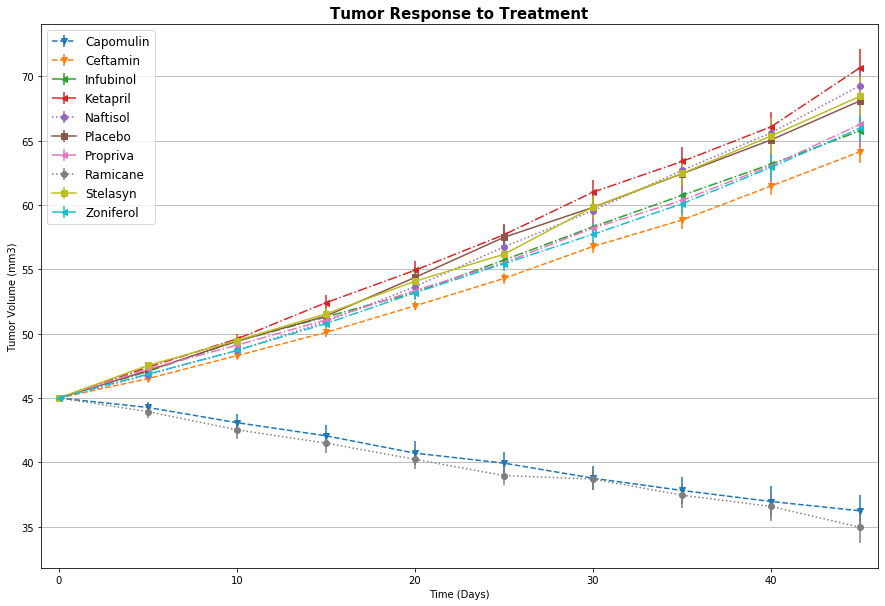

In [13]:
# 
formats = [':o','--v','-^','-.<','-s']

fig, ax = plt.subplots(figsize=(15, 10))

i = 0
for x in columns:
    ax.errorbar(x_axis, mean_drug[i], standard_errors_drug[i], fmt=random.choice(formats) )
    i=i+1

handles = columns
ax.set_title('Tumor Response to Treatment', fontweight = "bold", fontsize = 15)
ax.set_xlim(-1,46)
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend(handles, loc="best", prop={'size': 12})
ax.grid(axis = "y")
plt.savefig("Images/01_tumor_response.png", dpi=fig.dpi)
plt.show()

## Metastatic Response to Treatment

In [14]:
grouped_met = combined_df[["Timepoint", "Metastatic Sites", "Drug"]]
grouped_met

,Timepoint,Metastatic Sites,Drug
0,0,0,Capomulin
1,0,0,Ketapril
2,0,0,Ketapril
3,0,0,Ketapril
4,0,0,Ketapril
...,...,...,...
1901,45,2,Capomulin
1902,45,3,Capomulin
1903,45,1,Ceftamin
1904,45,4,Placebo


In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met_mean = pd.DataFrame(grouped_met.groupby(["Drug","Timepoint"],as_index = False).mean())
grouped_met_mean

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_sem = pd.DataFrame(grouped_met.groupby(["Drug","Timepoint"]).sem().reset_index())
grouped_met_sem

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [17]:
# Convert to DataFrame
grouped_met_sem_reform = grouped_met_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
grouped_met_sem_reform

# Preview DataFrame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [18]:
# Minor Data Munging to Re-Format the Data Frames
grouped_met_mean_reform = grouped_met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
grouped_met_mean_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [19]:
mean_met = []
for x in grouped_met_mean_reform:
    mean_met.append(list(grouped_met_mean_reform[x]))


In [20]:
standard_errors_met = []
for x in grouped_met_sem_reform:
    standard_errors_met.append(list(grouped_met_sem_reform[x]))


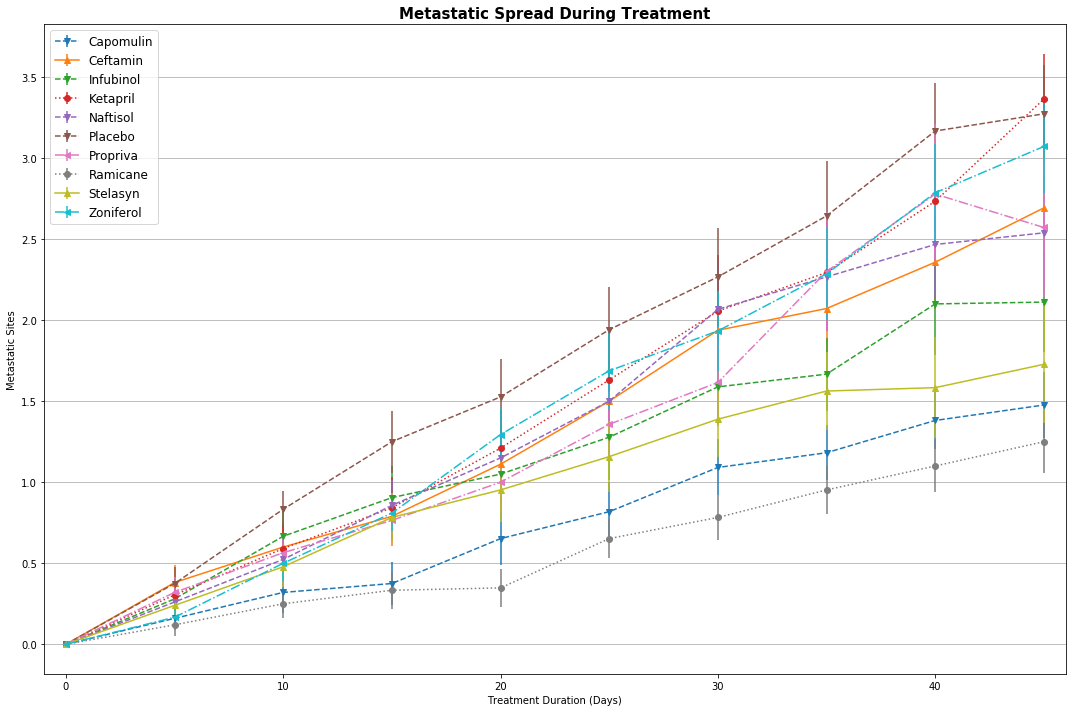

In [21]:
formats = [':o','--v','-^','-.<','-s']

fig, ax = plt.subplots(figsize=(15, 10))

i = 0
for x in columns:
    ax.errorbar(x_axis, mean_met[i], standard_errors_met[i], fmt=random.choice(formats) )
    i=i+1

handles = columns
ax.set_title('Metastatic Spread During Treatment', fontweight = "bold", fontsize = 15)
#ax.setfigsize()
ax.set_xlim(-1,46)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Metastatic Sites")
ax.legend(handles, loc="best", prop={'size': 12})
ax.grid(axis = "y")
plt.tight_layout()
plt.savefig("Images/02_spread.png", dpi=fig.dpi)
plt.show()

## Survival Rates

In [22]:
grouped_mouse_count = combined_df[["Timepoint", "Mouse ID", "Drug"]]
grouped_mouse_count

,Timepoint,Mouse ID,Drug
0,0,b128,Capomulin
1,0,f932,Ketapril
2,0,g107,Ketapril
3,0,a457,Ketapril
4,0,c819,Ketapril
...,...,...,...
1901,45,r944,Capomulin
1902,45,u364,Capomulin
1903,45,p438,Ceftamin
1904,45,x773,Placebo


In [23]:
grouped_mouse_count = pd.DataFrame(grouped_mouse_count.groupby(["Drug","Timepoint"],as_index = False).count())
grouped_mouse_count

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [24]:
grouped_mouse_count_reform = grouped_mouse_count.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
grouped_mouse_count_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [25]:
mouse_count = []
for x in grouped_mouse_count_reform:
    mouse_count.append(list(grouped_mouse_count_reform[x]))

In [26]:
# Saving a list with the % values 

i=0
count_percent = []
for x in columns:
    count_drug = mouse_count[i]
    d = 0
    drug_percent = []
    for y in count_drug:
        value = (mouse_count[i][d]/mouse_count[i][0])*100
        #(ex.: mouse_count[0][5] = 22)
        drug_percent.append(value)
        d = d + 1
    count_percent.append(drug_percent)
    i=i+1

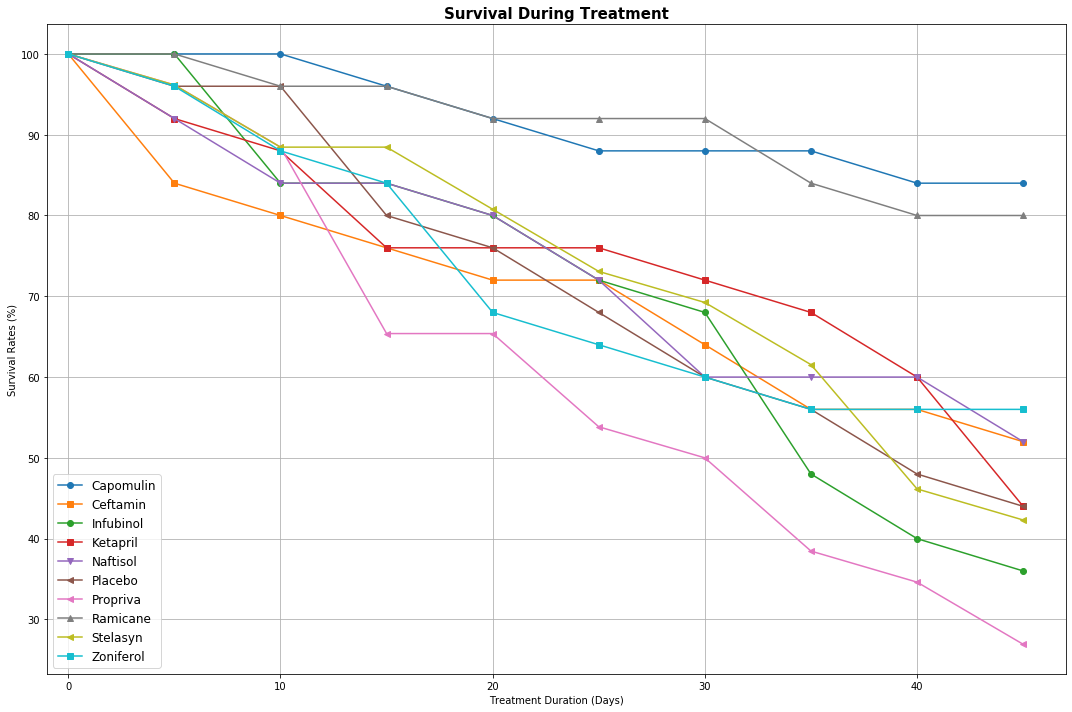

In [27]:
formats = ['o','v','^','<','s']

fig, ax = plt.subplots(figsize=(15, 10), )

i = 0
for x in columns:
    ax.plot(x_axis, count_percent[i], marker=random.choice(formats), ls="-")
    i=i+1

handles = columns
ax.set_title('Survival During Treatment', fontweight = "bold", fontsize = 15)
ax.set_xlim(-1,47)
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Survival Rates (%)")
ax.legend(handles, loc="best", prop={'size': 12})
plt.tight_layout()
ax.grid()
plt.savefig("Images/03_survival_rates.png", dpi=fig.dpi)
plt.show()

## Summary Bar Graph

In [28]:
grouped_mean_reform

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [29]:
# Saving a list with the % values 
# Display the data to confirm
i=0
drug_percent = []
for x in columns:
    volume_drug = mean_drug[i]
    d = 0
    for y in mean_drug:
        value = ((mean_drug[i][d] - mean_drug[i][0] )/mean_drug[i][0])*100
        d = d + 1
    drug_percent.append(value)
    i=i+1
drug_percent
drug_percent_df = pd.DataFrame(drug_percent, columns)
drug_percent_df.columns = ["change"]
drug_percent_df

,change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


In [41]:
# Slice the data between passing and failing drugs
# set placebo as minimum value for relevant failure

selection = (drug_percent_df["change"] < 0) | (drug_percent_df["change"] >= 51.297960)
relevant_drug_df = pd.DataFrame(data = drug_percent_df[selection])
relevant_drug_df.reset_index(inplace=True)


In [31]:
relevant_drug_df = relevant_drug_df.rename(columns = {"index": "Drug"})

In [32]:
relevant_drug_df

,Drug,change
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Placebo,51.297960
4,Ramicane,-22.320900
5,Stelasyn,52.085134


In [33]:
# Use functions to label the percentages of changes
# passing drugs are green failing drugs are red

def drug_result(value):
    if value >= 51.297960:
        return "r"
    else:
        return "g"

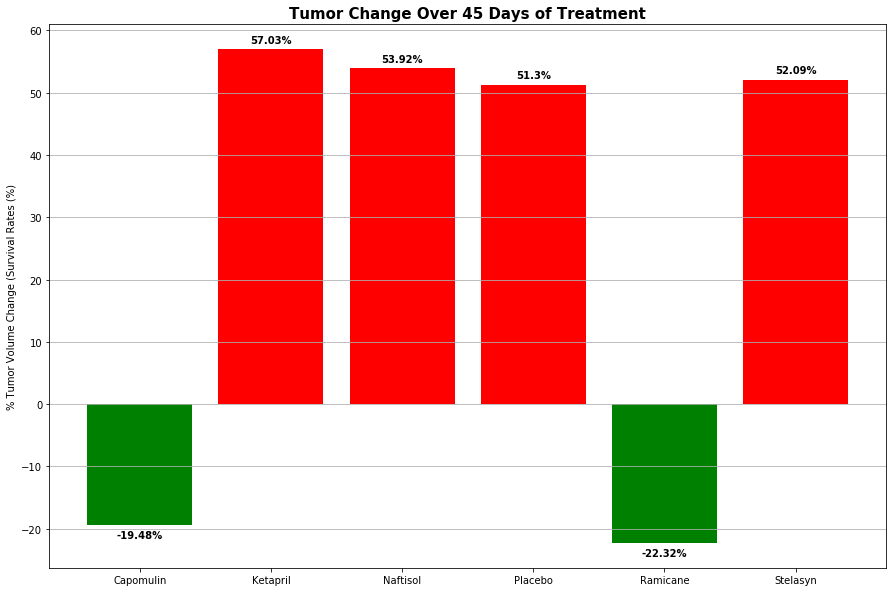

In [40]:
fig, ax = plt.subplots(figsize=(15, 10))

# Call functions to implement the function calls
for index, row in relevant_drug_df.iterrows():
    
    # plot each relevant drug, using the function to select the color of the bar
    ax.bar(relevant_drug_df["Drug"][index], relevant_drug_df["change"][index], align="center",\
           facecolor = drug_result(relevant_drug_df["change"][index]))
    
    # set the position of the legend for each bar
    if relevant_drug_df["change"][index] > 0:
        ax.text(relevant_drug_df["Drug"][index], relevant_drug_df["change"][index] +1,\
                 str(round(relevant_drug_df["change"][index],2))+"%",\
                color='black', fontweight='bold',horizontalalignment='center')
    else:
        ax.text(relevant_drug_df["Drug"][index], relevant_drug_df["change"][index] -2,\
                str(round(relevant_drug_df["change"][index],2))+"%",\
                color='black', fontweight='bold',horizontalalignment='center')

# set labels, title and save the fig 
ax.set_title('Tumor Change Over 45 Days of Treatment', fontweight = "bold", fontsize = 15)
ax.set_ylabel("% Tumor Volume Change (Survival Rates (%)")
ax.grid(axis = "y")
plt.savefig("Images/04_changes.png", dpi=fig.dpi)
plt.show()

        

# Results Observations

 - During the treatment period, only 2 drugs were effective in reducing tumor volume. As shown in the chart below, the drugs, Capomulin and Ramicane, managed to reduce tumor volume by 19.48% and 22.32% respectively. On the other hand, 3 drugs performed worse than the Placebo in terms of tumor volume reduction. Ketapril, Naftisol and Stelasyn showed the worst performances with a tumor size increase of 57.03%, 52.92% and 52.09% respectively.

![Tumor Changes](Images/04_changes.png)

 - Considering survival rate, again, Capomulin and Ramicane achieved the best results, with over 90% of subjects surviving at the end of the treatment period. Although some drugs obtained results above Placebo in terms of tumor volume reduction, they did not perform well when analyzing the survival rate. Infubinol (34%) and Propriva (26%) achieved the two worst survival rates in the study, as shown in the chart below. Using only these two criteria, Survival Rate and Tumor Volume, one can assume that while they are more efficient than Placebo in reducing tumor volume, they can be very aggressive also to the subject's body.
   

![Survival Rates During Treatment](Images/03_survival_rates.png)

 - Regarding Metastatic spread during the treatment all but one drug performed better then the Placebo. The metastatic sites for the two most efficient drugs in the study, Capomulin and Ramicane, remained at levels below 1.5, again, indicating these drugs as a general good choice as cancer medicine.

![Tumor Spread](Images/02_spread.png)